problem a)the number of isolated nodes is: 659

problem b)the largest degree in this graph is: 23, the words is: ['cares']

problem c)there are total:810 components

problem d)the largest distance is: 21,the words is: retry

problem e)the largest distance is 1654 ,words at this distance are :glare,shady

In [1]:
from pythonds.graphs import Graph, Vertex
from pythonds.basic import Queue
import matplotlib.pyplot as plt

In [2]:
def buildGraph(wordFile):
    d = {}
    g = Graph()
    wfile = open(wordFile,'r')
    # create buckets of words that differ by one letter
    for line in wfile:
        word = line[:-1]
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
    return g

In [3]:
wordfile = 'D:/2021spring/statistic compute with python/hw05/words5.txt'
g = buildGraph(wordfile)

In [4]:
wfile=open(wordfile,'r')
nodes={}
words=[]
for line in wfile:
    word = line[:-1]
    words.append(word)
    count=0
    for v in g:        
        if word == v.getId():            
            for w in v.getConnections():
                count+=1
            nodes[word]=count
        else:
            nodes[word]=count


In [5]:
keys = list(nodes.keys())
values = list(nodes.values())
largest = max(values)
isolate =values.count(0)

#print(values.sort())
position = values.index(largest)
word_lar = keys[position]

print('problem a)the number of isolated nodes is:',isolate)
print('problem b)the largest degree in this graph is: %d, the words is: %s'%(largest,word_lar)) 

problem a)the number of isolated nodes is: 659
problem b)the largest degree in this graph is: 23, the words is: cares


In [6]:
import unionfind as un

In [7]:
x = un.unionfind(len(words))

In [8]:
for i in range(len(words)):
    word = words[i]
    count = 0
    for v in g:
        if word == v.getId():
            for nbr in v.getConnections():
                nbr_name = nbr.getId()
                nbr_index = words.index(nbr_name)
                x.unite(i,nbr_index)

In [10]:
groups = len(x.groups())
print("problem c)there are total:%d components"%(groups))

problem c)there are total:810 components


In [10]:
size = []

In [26]:
for i in range(groups):
    size_ = len(x.groups()[i])
    size.append(size_)


problem c)there are total:5821 components


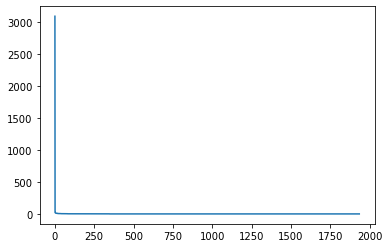

In [30]:

size.sort(reverse = True)
plt.plot(size)        

In [31]:
graph = buildGraph(wordfile)

In [32]:
def bfs(g,start):
#    print(start.getId())
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
#    deepest = 0
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        for nbr in currentVert.getConnections():
            if (nbr.getColor() == 'white'):
                nbr.setColor('gray')
                nbr.setDistance(currentVert.getDistance() + 1)
                nbr.setPred(currentVert)
                vertQueue.enqueue(nbr)
#                if nbr.getDistance()>=deepest:
#                     deepest = nbr.getDistance()
#                    print(nbr)
                if nbr.getDistance()>=21:
#                    print(nbr)      
                    print('problem d)the largest distance is: %d,the words is: %s'%(nbr.getDistance(),nbr.getId()))
        currentVert.setColor('black')


In [33]:
for v in graph:
    if v.getId() == 'study':
        start = v
bfs(graph,start)

problem d)the largest distance is: 21,the words is: retry


In [34]:
class DFSGraph(Graph):
    def __init__(self):
        super().__init__()
        self.time = 0

    def dfs(self):
        for aVertex in self:
            aVertex.setColor('white')
            aVertex.setPred(-1)
        for aVertex in self:
            if aVertex.getColor() == 'white':
                self.dfsvisit(aVertex)

    def dfsvisit(self,startVertex,lay,deep):
        startVertex.setColor('gray')
        self.time += 1
        startVertex.setDiscovery(self.time)
        for nextVertex in startVertex.getConnections():
            if nextVertex.getColor() == 'white':
                deep[nextVertex.getId()]=lay
#                print(lay)
#                print('child is: %s, parents is: %s'%(nextVertex.getId(),startVertex.getId()))
                nextVertex.setPred(startVertex)
                self.dfsvisit(nextVertex,lay+1,deep)     
        startVertex.setColor('black')
        self.time += 1
        startVertex.setFinish(self.time)
        return deep
        

In [35]:
Gra = buildGraph(wordfile)
for v in Gra:
    if v.getId() == 'study':
        start = v
test=DFSGraph()
deep={}
deepth = test.dfsvisit(start,1,deep)

In [37]:
keys = list(deep.keys())
values = list(deepth.values())
values.sort()
for key in keys:
    if deepth[key] == values[-1]:
        print('the largest distance is %d ,words at this distance are :%s'%(values[-1],key))


the largest distance is 1654 ,words at this distance are :glare
the largest distance is 1654 ,words at this distance are :shady
